In [1]:
import math
import torch

def linear_beta_schedule(timesteps, beta1, beta2):
    assert 0.0 < beta1 < beta2 < 1.0, "beta1 and beta2 must be in (0, 1)"
    return torch.linspace(beta1, beta2, timesteps)

def cosine_beta_schedule(timesteps, s = 0.008):
    """
    cosine schedule
    as proposed in http://proceedings.mlr.press/v139/nichol21a/nichol21a.pdf
    """
    steps = timesteps + 1
    t = torch.linspace(0, timesteps, steps) / timesteps # dtype = torch.float64
    alphas_cumprod = torch.cos((t + s) / (1 + s) * math.pi * 0.5) ** 2
    alphas_cumprod = alphas_cumprod / alphas_cumprod[0]
    betas = 1 - (alphas_cumprod[1:] / alphas_cumprod[:-1])
    return torch.clip(betas, 0, 0.999)

def inverted_cosine_beta_schedule(timesteps, s = 0.008):
    """
    inverted cosine schedule
    as proposed in https://arxiv.org/pdf/2311.17901.pdf
    """
    steps = timesteps + 1
    t = torch.linspace(0, timesteps, steps) / timesteps # dtype = torch.float64
    alphas_cumprod = (2 * (1 + s) / math.pi) * torch.arccos(torch.sqrt(t)) - s
    alphas_cumprod = alphas_cumprod / alphas_cumprod[0]
    betas = 1 - (alphas_cumprod[1:] / alphas_cumprod[:-1])
    return torch.clip(betas, 0, 0.999)

def schedules(betas):
    beta_t = torch.cat([torch.tensor([0.0]), betas])
    alpha_t = 1 - beta_t
    log_alpha_t = torch.log(alpha_t)
    alphabar_t = torch.cumsum(log_alpha_t, dim=0).exp()
    return alphabar_t

/irip/xiangweilai_2021/anaconda3/envs/diffu/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
T = 1000
linear = linear_beta_schedule(T, 1e-4, 0.02)
cosine = cosine_beta_schedule(T)
invert = inverted_cosine_beta_schedule(T)
print(linear.shape, cosine.shape, invert.shape)
print((linear.max(), linear.min()), (cosine.max(), cosine.min()), (invert.max(), invert.min()))

linear = schedules(linear)
cosine = schedules(cosine)
invert = schedules(invert)
print(linear.shape, cosine.shape, invert.shape)
print((linear.max(), linear.min()), (cosine.max(), cosine.min()), (invert.max(), invert.min()))

torch.Size([1000]) torch.Size([1000]) torch.Size([1000])
(tensor(0.0200), tensor(1.0000e-04)) (tensor(0.9990), tensor(4.1246e-05)) (tensor(0.9990), tensor(0.0011))
torch.Size([1001]) torch.Size([1001]) torch.Size([1001])
(tensor(1.), tensor(4.0358e-05)) (tensor(1.), tensor(2.4289e-09)) (tensor(1.), tensor(1.2296e-05))


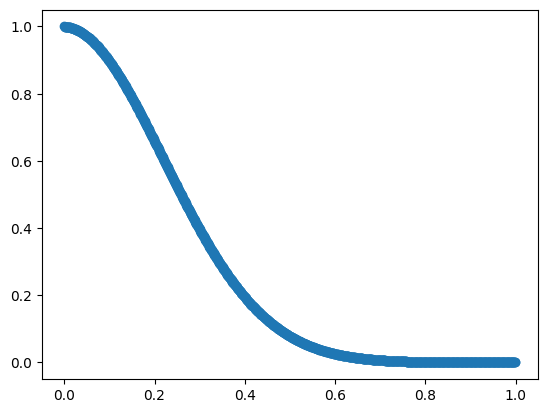

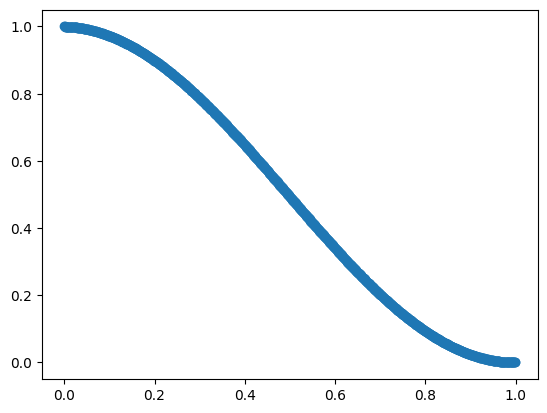

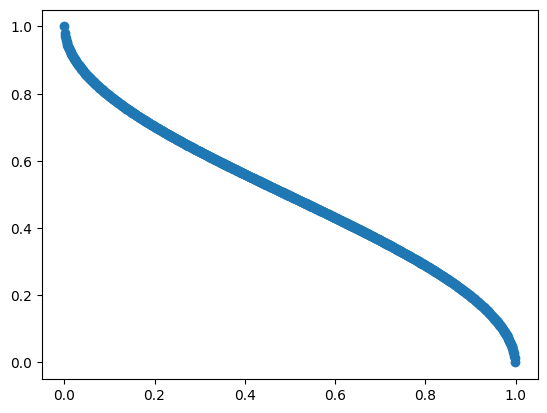

In [3]:
from matplotlib import pyplot as plt
def plot(abt):
    x = torch.arange(0, len(abt)) / len(abt)
    plt.scatter(x=x, y=abt)
    plt.show()

plot(linear)
plot(cosine)
plot(invert)